In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

import warnings 
warnings.filterwarnings('ignore')


plt.style.use('Solarize_Light2')
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('ai_job_dataset.csv')

In [3]:
df.head()

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
0,AI00001,AI Research Scientist,90376,USD,SE,CT,China,M,China,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9,Automotive,2024-10-18,2024-11-07,1076,5.9,Smart Analytics
1,AI00002,AI Software Engineer,61895,USD,EN,CT,Canada,M,Ireland,100,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,Media,2024-11-20,2025-01-11,1268,5.2,TechCorp Inc
2,AI00003,AI Specialist,152626,USD,MI,FL,Switzerland,L,South Korea,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,2,Education,2025-03-18,2025-04-07,1974,9.4,Autonomous Tech
3,AI00004,NLP Engineer,80215,USD,SE,FL,India,M,India,50,"Scala, SQL, Linux, Python",PhD,7,Consulting,2024-12-23,2025-02-24,1345,8.6,Future Systems
4,AI00005,AI Consultant,54624,EUR,EN,PT,France,S,Singapore,100,"MLOps, Java, Tableau, Python",Master,0,Media,2025-04-15,2025-06-23,1989,6.6,Advanced Robotics


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   job_id                  15000 non-null  object 
 1   job_title               15000 non-null  object 
 2   salary_usd              15000 non-null  int64  
 3   salary_currency         15000 non-null  object 
 4   experience_level        15000 non-null  object 
 5   employment_type         15000 non-null  object 
 6   company_location        15000 non-null  object 
 7   company_size            15000 non-null  object 
 8   employee_residence      15000 non-null  object 
 9   remote_ratio            15000 non-null  int64  
 10  required_skills         15000 non-null  object 
 11  education_required      15000 non-null  object 
 12  years_experience        15000 non-null  int64  
 13  industry                15000 non-null  object 
 14  posting_date            15000 non-null

## EDA 

### Salary Analysis

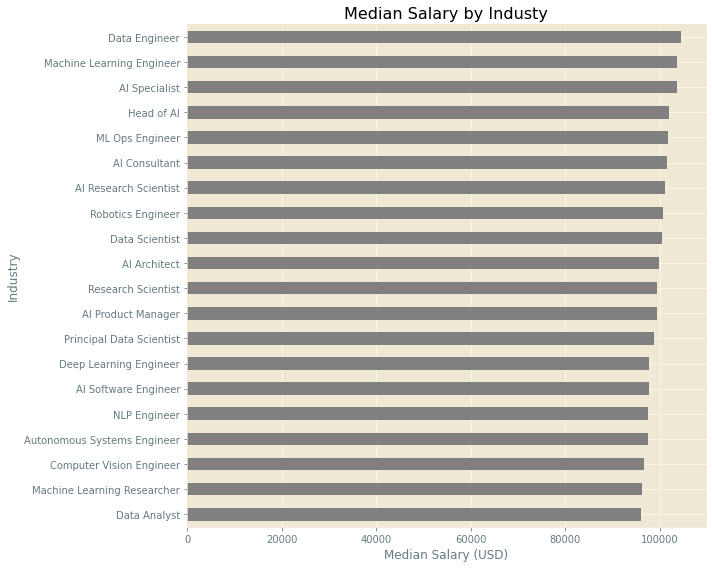

In [6]:
#1. What job titles have the highest and the lowest average salaries 

median_salary = df.groupby('job_title')['salary_usd'].median().sort_values()

median_salary.plot(kind = 'barh', figsize = (10,8), color = 'grey')
plt.title('Median Salary by Industy')
plt.ylabel('Industry')
plt.xlabel('Median Salary (USD)')

plt.tight_layout()
plt.show()

According to the dataset, Data Engineer have the highest average salary, whereas Data Analysts have the lowest.

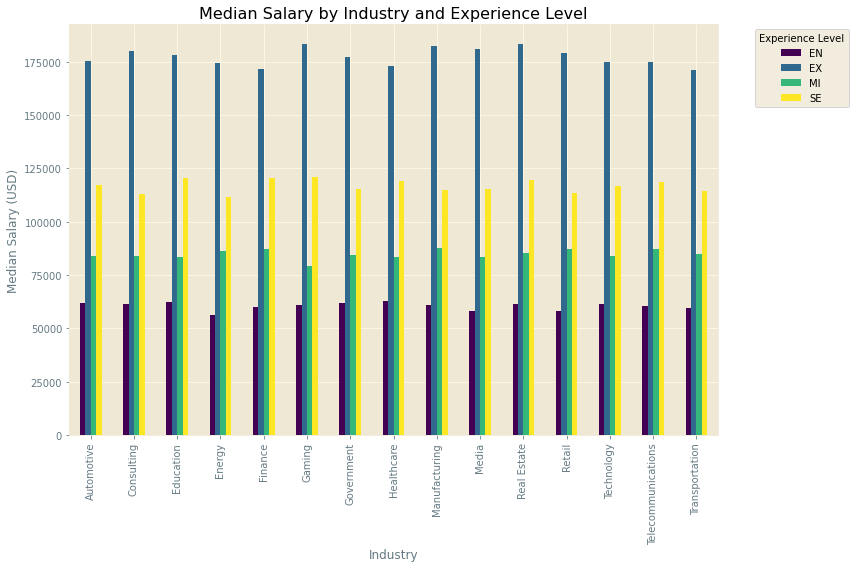

In [7]:
#2.How does salary vary by experience level , company size or industry ?

# Median salary grouped by industry and experience
salary_by_industry_exp = df.groupby(['industry', 'experience_level'])['salary_usd'].median().unstack()

#  grouped bar chart
salary_by_industry_exp.plot(kind='bar', figsize=(12, 8), colormap='viridis')
plt.ylabel('Median Salary (USD)')
plt.xlabel('Industry')
plt.title('Median Salary by Industry and Experience Level')
plt.legend(title='Experience Level', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


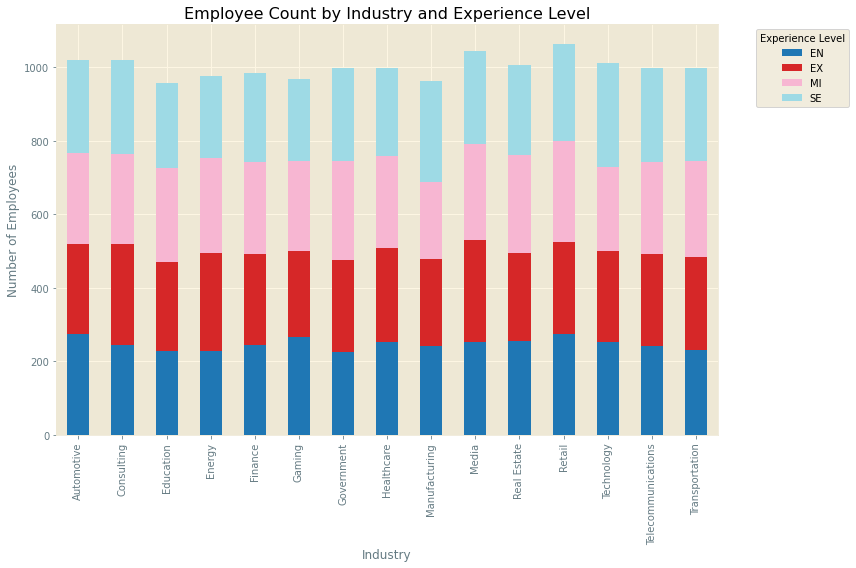

In [8]:
# Employee count based on the industry and the experience level
count_by_industry_exp = df.groupby(['industry', 'experience_level']).size().unstack()

count_by_industry_exp.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='tab20')
plt.ylabel('Number of Employees')
plt.xlabel('Industry')
plt.title('Employee Count by Industry and Experience Level')
plt.legend(title='Experience Level', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


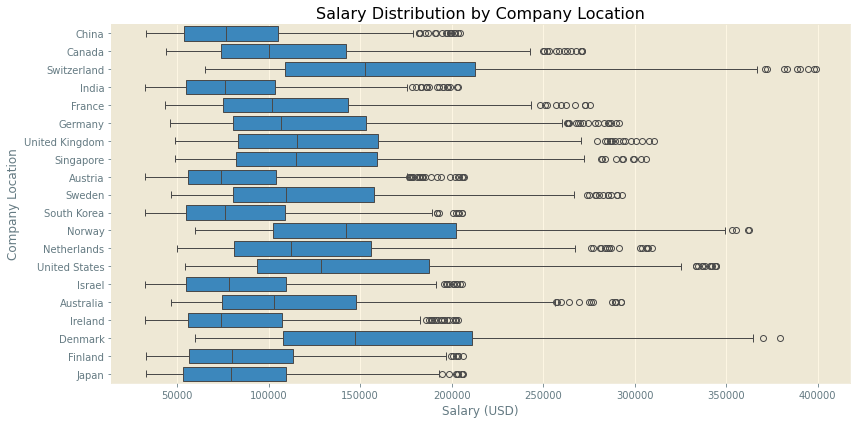

In [9]:
#. salary distribution across different company 

plt.figure(figsize  = (12,6))
sns.boxplot(data = df, x = 'salary_usd', y ='company_location')
plt.xlabel('Salary (USD)')
plt.ylabel('Company Location')
plt.title('Salary Distribution by Company Location')

plt.tight_layout()
plt.show()

<Axes: xlabel='salary_usd', ylabel='Count'>

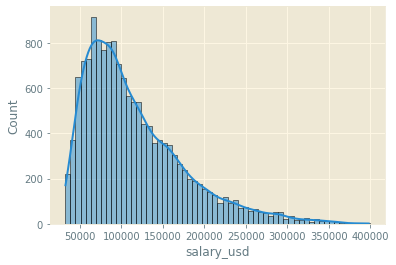

In [10]:
sns.histplot(df['salary_usd'], kde =True)

### Experience and education

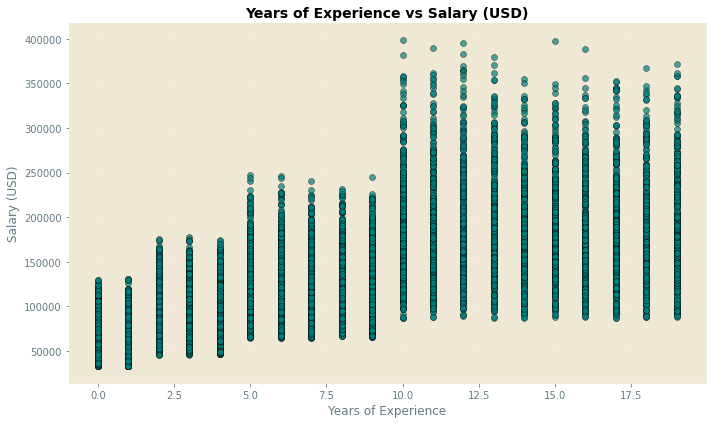

In [11]:
# Visualizing the Relationship Between Experience and Salary


plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='years_experience', y='salary_usd', color='teal', edgecolor='black', alpha=0.7)
plt.title('Years of Experience vs Salary (USD)', fontsize=14, fontweight='bold')
plt.xlabel('Years of Experience', fontsize=12)
plt.ylabel('Salary (USD)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


In [12]:
#4. How does salary correlate with years of experience?

# Calculating the Pearson correlation coefficient to assess the linear relationship

correlation = df['years_experience'].corr(df['salary_usd'])
print(f"Correlation between Years of Experience and Salary (USD): {correlation:.2f}")


Correlation between Years of Experience and Salary (USD): 0.74


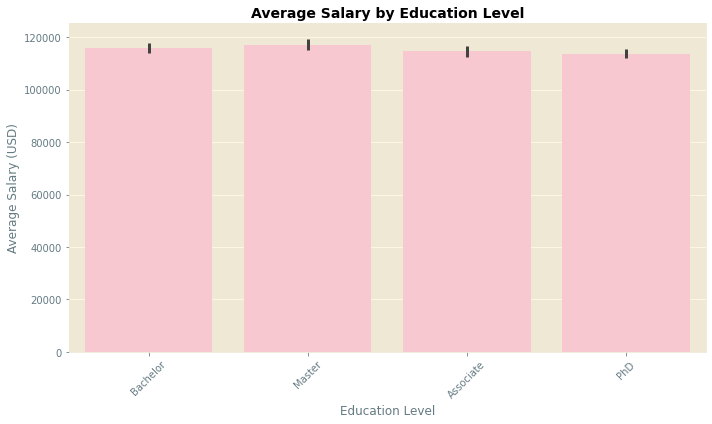

In [13]:
# 5. What education level typically commands higher salaries?
# Bar plot showing the average salary for each education level

plt.figure(figsize=(10, 6))
sns.barplot(x='education_required', y='salary_usd', data=df, color='pink', estimator='mean')
plt.title('Average Salary by Education Level', fontsize=14, fontweight='bold')
plt.xlabel('Education Level', fontsize=12)
plt.ylabel('Average Salary (USD)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


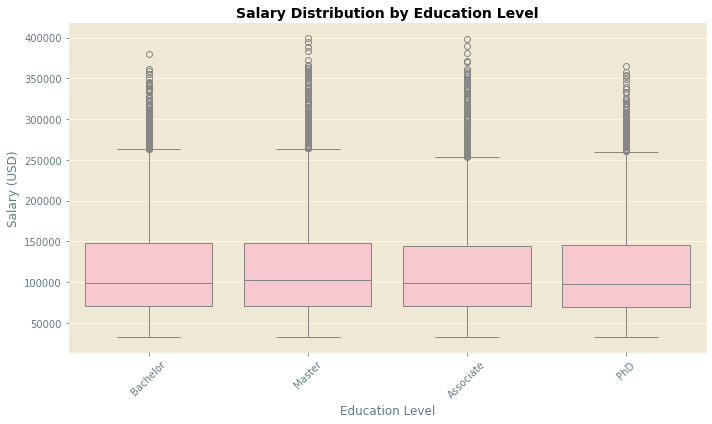

In [14]:
# 6. Distribution of Salaries by Education Level
# Box plot visualizing the spread, median, and outliers of salary across education levels

plt.figure(figsize=(10, 6))
sns.boxplot(x='education_required', y='salary_usd', data=df, color='pink')
plt.title('Salary Distribution by Education Level', fontsize=14, fontweight='bold')
plt.xlabel('Education Level', fontsize=12)
plt.ylabel('Salary (USD)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In this dataset, education level alone is not a strong differentiator of salary. Other factors like experience level, job title, location, or industry may play a more significant role.


In [15]:
#  6. Which Job Roles Commonly Require Specific Education Levels?

edu_job_matrix = df.groupby(['job_title', 'education_required']).size().unstack().fillna(0)
display(edu_job_matrix)


education_required,Associate,Bachelor,Master,PhD
job_title,,,,
AI Architect,209,180,200,182
AI Consultant,199,166,170,169
AI Product Manager,181,186,190,186
AI Research Scientist,195,186,199,176
AI Software Engineer,199,209,185,191
AI Specialist,174,168,193,193
Autonomous Systems Engineer,204,181,185,207
Computer Vision Engineer,167,180,181,196
Data Analyst,174,208,202,175


no fixed or exclusive education requirement for most roles. 

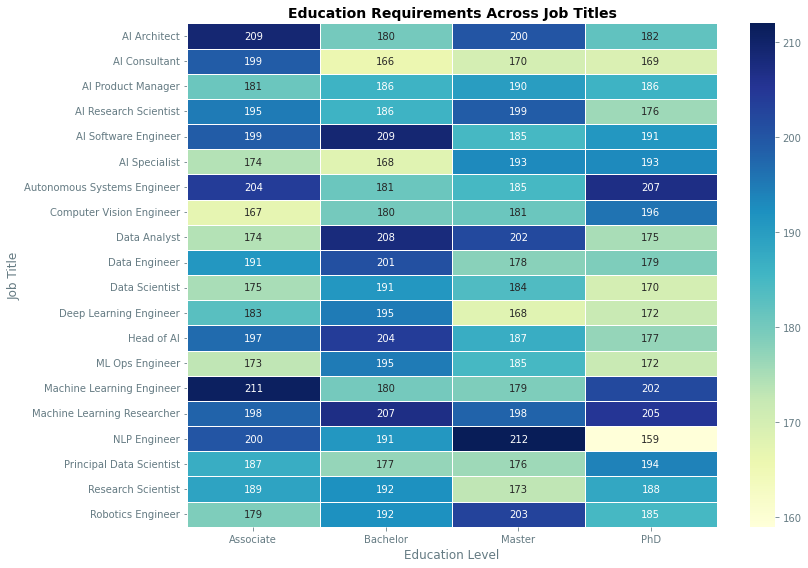

In [16]:
plt.figure(figsize=(12, 8))
sns.heatmap(edu_job_matrix, annot=True, fmt='.0f', cmap='YlGnBu', linewidths=0.5)
plt.title('Education Requirements Across Job Titles', fontsize=14, fontweight='bold')
plt.xlabel('Education Level', fontsize=12)
plt.ylabel('Job Title', fontsize=12)
plt.tight_layout()
plt.show()


#### Remote work insight 

In [22]:
#7. Do remote jobs tend to offer higher or lower salaries?

# Mapping numeric codes to remote work types
remote_map = {
    0: 'Remote',
    50: 'Hybrid',
    100: 'In-person'
}

df['work_model'] = df['remote_ratio'].map(remote_map)


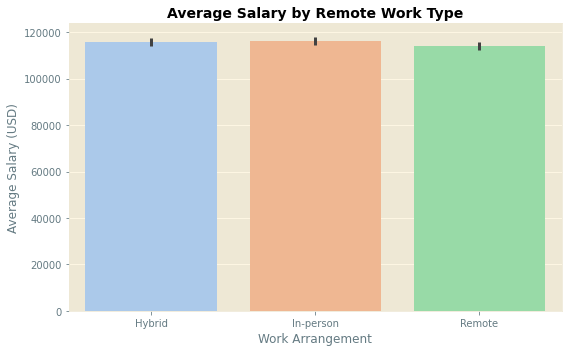

In [24]:
# barplot with labeled remote types
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='work_model', y='salary_usd', palette='pastel', estimator='mean')
plt.title('Average Salary by Remote Work Type', fontsize=14, fontweight='bold')
plt.xlabel('Work Arrangement', fontsize=12)
plt.ylabel('Average Salary (USD)', fontsize=12)
plt.tight_layout()
plt.show()


In [132]:
#8. Which companies or job role are most likely to offer remote work


df[df['work_model'] == 'remote']['industry'].value_counts()


industry
Media                 363
Retail                363
Telecommunications    348
Government            346
Automotive            345
Education             342
Transportation        342
Technology            340
Healthcare            336
Energy                335
Consulting            335
Gaming                327
Manufacturing         323
Finance               318
Real Estate           312
Name: count, dtype: int64

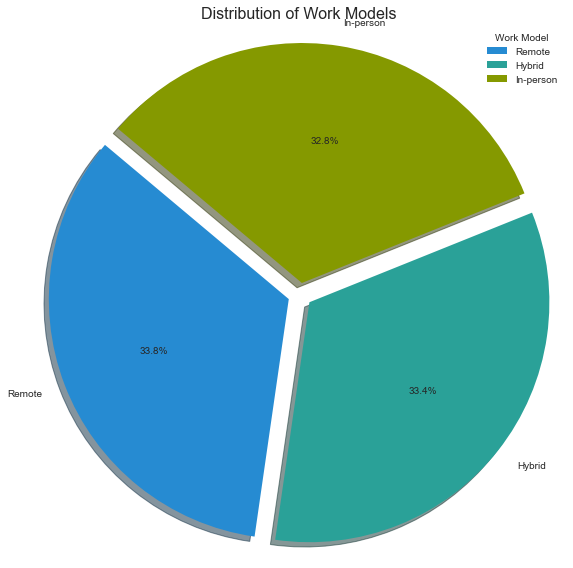

In [25]:
plt.style.use('seaborn-v0_8-darkgrid')
#9. What is the Distribution of Work Models- pie chart to visualize
#the proportion of remote, hybrid, and in-person job arrangements in the dataset.

labels = df['work_model'].value_counts().index
sizes = df['work_model'].value_counts().values
explode = [0.05]* len(labels)

plt.figure(figsize = (8,8))
plt.pie(sizes, labels = labels, explode = explode, autopct='%1.1f%%', shadow= True, startangle = 140)
plt.title('Distribution of Work Models')
plt.legend(labels, title = 'Work Model')
plt.axis('equal')
plt.tight_layout()
plt.show()



#### skillset analysis

In [28]:
#10. which skills are most frequently listed in high-paying jobs 

df['required_skills']

0               Tableau, PyTorch, Kubernetes, Linux, NLP
1        Deep Learning, AWS, Mathematics, Python, Docker
2           Kubernetes, Deep Learning, Java, Hadoop, NLP
3                              Scala, SQL, Linux, Python
4                           MLOps, Java, Tableau, Python
                              ...                       
14995                            Java, Kubernetes, Azure
14996            Mathematics, Docker, SQL, Deep Learning
14997                                  Scala, Spark, NLP
14998          Java, Computer Vision, Python, TensorFlow
14999      Scala, Azure, Deep Learning, GCP, Mathematics
Name: required_skills, Length: 15000, dtype: object

In [29]:
## top 5 salaries 
top_sal = df['salary_usd'].sort_values(ascending = False).head(5).values.tolist()

In [30]:
skill_word_count = {}

for i in df[df['salary_usd'].isin(top_sal)]['required_skills']:
    for j in (i.split(',')):
        if j not in skill_word_count:
            skill_word_count[j] = 1
        else:
            skill_word_count[j] = skill_word_count[j]+1
            
skill_word_count

{'Docker': 1,
 ' Python': 2,
 ' Mathematics': 1,
 'Python': 1,
 ' Linux': 1,
 ' Tableau': 1,
 ' TensorFlow': 3,
 'Linux': 1,
 'Scala': 1,
 ' PyTorch': 2,
 ' Spark': 1,
 ' Docker': 1,
 ' Git': 1,
 'Java': 1,
 ' SQL': 1,
 ' Statistics': 1}

Among the top 5 most paid jobs Tensorflow is the most relevant skill

In [31]:
#11. what is the relation between the benefits score and salary 

df['benefits_score'].corr(df['salary_usd'])

0.0009852305477354498

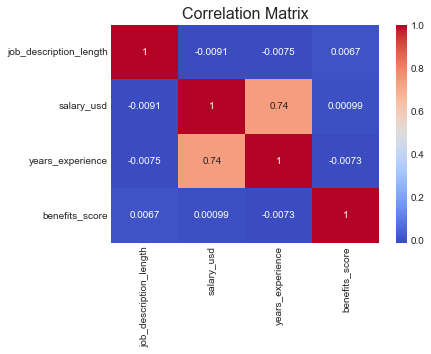

In [32]:
#12.Does the length of job description (job_description_length) correlate with salary, seniority, or benefits?

corr = df[['job_description_length', 'salary_usd', 'years_experience', 'benefits_score']].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

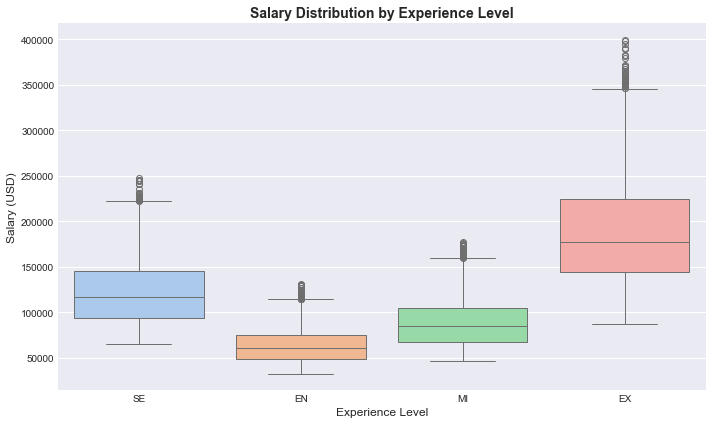

In [33]:
## 13. How Does Salary Differ Based on Experience Level?
# Box plot showing salary distribution across different experience levels 
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='experience_level', y='salary_usd', palette='pastel')
plt.title('Salary Distribution by Experience Level', fontsize=14, fontweight='bold')
plt.xlabel('Experience Level', fontsize=12)
plt.ylabel('Salary (USD)', fontsize=12)
plt.tight_layout()
plt.show()

In [34]:
## working with the date columns
date_cols = ['posting_date', 'application_deadline']

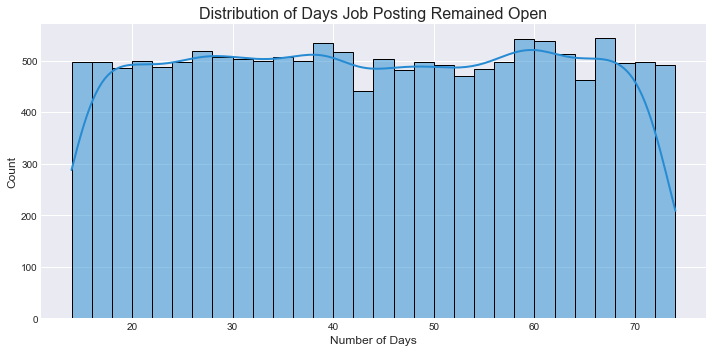

In [35]:
for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors = 'coerce')
    
## getting the difference between the posting date and the application date

df['day_posting_open'] = (df['application_deadline']-df['posting_date']).dt.days
plt.figure(figsize=(10, 5))
sns.histplot(data = df , x = 'day_posting_open', kde=True, bins=30)
plt.title('Distribution of Days Job Posting Remained Open')
plt.xlabel('Number of Days')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [37]:
#14. Do Job Postings Stay Open Longer for Certain Positions?


df.groupby('job_title')['day_posting_open'].apply(
    lambda x: x.mode().iloc[0]
).sort_values(ascending = False)

job_title
Robotics Engineer              70
Data Analyst                   68
Deep Learning Engineer         66
Machine Learning Researcher    63
Machine Learning Engineer      60
ML Ops Engineer                59
AI Consultant                  56
Autonomous Systems Engineer    54
Research Scientist             50
AI Architect                   48
NLP Engineer                   46
Data Scientist                 41
AI Specialist                  27
Computer Vision Engineer       25
Principal Data Scientist       24
AI Product Manager             23
AI Software Engineer           22
AI Research Scientist          22
Head of AI                     20
Data Engineer                  18
Name: day_posting_open, dtype: int64

In [38]:
# seeing if the posting opening last longer for the different levels

df.groupby('experience_level')['day_posting_open'].apply(lambda x: x.mode().iloc[0]).sort_values(ascending = False)

experience_level
MI    67
EX    66
SE    59
EN    48
Name: day_posting_open, dtype: int64